In [1]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
%matplotlib inline
from decimal import Decimal
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, f1_score
pd.options.display.float_format = "{:,.3f}".format
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:


# Load the data from CSV
data = pd.read_csv('TotalData1.csv')

# Select the relevant features and target variable
features = data[['rest rank',	'reviews num',	'Food rank',	'Service rank',	'atmosphere rank',	'price rank',	'None',	'Bar restaurant',	'Animal friendly',	'Possibility of sitting outside',	'Restaurant with free parking',	'A restaurant with regulated parking',	'Shipments',	'Take Away',	'Catering services',	'Chef to the house',	'Outdoor garden',	'dog friendly',	'Wi-fi',	'Country restaurant',	'Kosher restaurant',	'Accessibility for the disabled',	'Events up to 50 people',	'Family day',	'Restaurant for events and conferences',	'Team building days','fun days',	'meetings',	'Open on Friday',	'Sylvester',	'Table reservation service',	'Small events',	'Food ready to sit/take away',	'Boutique events',	'A strictly kosher restaurant',	'Bar/Bat Mitzvah',	'alliance',	'Open on Sundays',	'Events up to 30 people',	'Chef restaurant',	'Sukkot, Tabernacles',	'weddings'	,'birthdays'	,'wedding anniversaries',	'Seminars',	'conventions',	'Company parties',	'Department Arabs',	'cocktail',	'A place for events',	'private room',	'Events up to 150 people',	'Tapas bar',	'Shabbat observant business','Restaurant with meat shop',	'Projector and screen',	'live shows',	'Access to public transportation',	'Tutorials/workshops',	'conference rooms',	'Location for photography',	'amplification equipment'	,'Events up to 300 people',	'press conferences'	,'Bachelor/bachelorette parties'	,'Exhibitions',	'Fashion shows',	'Smoking area',	'Events up to 200 people',	'Night Life'	,'Events up to 100 people',	'Open on Passover',	'Arrangements for businesses, institutions and factories',	'with a sukkah',	'A restaurant with a wine cellar',	'Open on Saturday',	'Restaurants on the sea',	'sports bar',	'A restaurant with discounts for students'	,'A restaurant in nature',	'burger club',	'fast food',	'Neighborhood bar/pub'	,'Irish pub'	,'Crazy Sunday']]
target = data['rest rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 6.0310328086625025e-28
R2 Score: 1.0


In [3]:

# Step 1: Load the CSV file
data = pd.read_csv('TotalData1.csv')

# Step 2: Explore and preprocess the data
# Perform any necessary preprocessing steps such as handling missing values and transforming data.

# Step 3: Feature selection
# Select the relevant features that may impact the restaurant rank, such as restaurant type, opening hours, and Wi-Fi availability.

# Step 4: Split the data
X = data[['rest add',	'rest open','rest type','rest rank','reviews num',	'Food rank',	'Service rank',	'atmosphere rank',	'price rank',	'None',	'Bar restaurant',	'Animal friendly',	'Possibility of sitting outside',	'Restaurant with free parking',	'A restaurant with regulated parking',	'Shipments',	'Take Away',	'Catering services',	'Chef to the house',	'Outdoor garden',	'dog friendly',	'Wi-fi',	'Country restaurant',	'Kosher restaurant',	'Accessibility for the disabled',	'Events up to 50 people',	'Family day',	'Restaurant for events and conferences',	'Team building days','fun days',	'meetings',	'Open on Friday',	'Sylvester',	'Table reservation service',	'Small events',	'Food ready to sit/take away',	'Boutique events',	'A strictly kosher restaurant',	'Bar/Bat Mitzvah',	'alliance',	'Open on Sundays',	'Events up to 30 people',	'Chef restaurant',	'Sukkot, Tabernacles',	'weddings'	,'birthdays'	,'wedding anniversaries',	'Seminars',	'conventions',	'Company parties',	'Department Arabs',	'cocktail',	'A place for events',	'private room',	'Events up to 150 people',	'Tapas bar',	'Shabbat observant business','Restaurant with meat shop',	'Projector and screen',	'live shows',	'Access to public transportation',	'Tutorials/workshops',	'conference rooms',	'Location for photography',	'amplification equipment'	,'Events up to 300 people',	'press conferences'	,'Bachelor/bachelorette parties'	,'Exhibitions',	'Fashion shows',	'Smoking area',	'Events up to 200 people',	'Night Life'	,'Events up to 100 people',	'Open on Passover',	'Arrangements for businesses, institutions and factories',	'with a sukkah',	'A restaurant with a wine cellar',	'Open on Saturday',	'Restaurants on the sea',	'sports bar',	'A restaurant with discounts for students'	,'A restaurant in nature',	'burger club',	'fast food',	'Neighborhood bar/pub'	,'Irish pub'	,'Crazy Sunday']]
y = data['rest rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Preprocess categorical variables
categorical_features = ['rest type']#,'rest add', 'rest open']
categorical_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Step 6: Choose a machine learning model
model = RandomForestRegressor()

# Step 7: Train the model
preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 9: Predict restaurant type and location
new_restaurant = pd.DataFrame({
    'rest add': ['חולון'],
    'rest open': ['No Info'],
    'rest type': ['A steakhouse'],
    'Wi-fi': [1],
    'Animal friendly': [1],
    'A restaurant with regulated parking': [1],
    'Outdoor garden': [1],
    'Events up to 50 people': [1]
})

r2 = r2_score(y_test, y_pred)
predicted_rank = pipeline.predict(new_restaurant)
print(f"Predicted Rank: {predicted_rank}")
print(r2)


Mean Squared Error: 4.365804946704362
Predicted Rank: [1.83896371]
0.021593674197960766


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load the data
data = pd.read_csv('TotalData1.csv')

# Separate features and target variable
X = data[['city','rest addres',	'rest open','rest type','reviews num', 'Food rank', 'Service rank', 'atmosphere rank', 'price rank',
          'None',	'Bar restaurant',	'Animal friendly',	'Possibility of sitting outside',	'Restaurant with free parking',	'A restaurant with regulated parking',
          'Shipments',	'Take Away',	'Catering services',	'Chef to the house',	'Outdoor garden',	'dog friendly',	'Wi-fi',	'Country restaurant',	
          'Kosher restaurant',	'Accessibility for the disabled',	'Events up to 50 people',	'Family day',	'Restaurant for events and conferences',	
          'Team building days','fun days',	'meetings',	'Open on Friday',	'Sylvester',	'Table reservation service',	'Small events',	'Food ready to sit/take away',	
          'Boutique events',	'A strictly kosher restaurant',	'Bar/Bat Mitzvah',	'alliance',	'Open on Sundays',	'Events up to 30 people',	'Chef restaurant',	'Sukkot, Tabernacles',
          'weddings'	,'birthdays'	,'wedding anniversaries',	'Seminars',	'conventions',	'Company parties',	'Department Arabs',	'cocktail',	'A place for events',
    	  'private room',	'Events up to 150 people',	'Tapas bar',	'Shabbat observant business','Restaurant with meat shop',	'Projector and screen',	'live shows',
          'Access to public transportation',	'Tutorials/workshops',	'conference rooms',	'Location for photography',	'amplification equipment'	,
          'Events up to 300 people',	'press conferences'	,'Bachelor/bachelorette parties'	,'Exhibitions',	'Fashion shows',	'Smoking area',	
          'Events up to 200 people',	'Night Life'	,'Events up to 100 people',	'Open on Passover',	'Arrangements for businesses, institutions and factories',
          'with a sukkah',	'A restaurant with a wine cellar',	'Open on Saturday',	'Restaurants on the sea',	'sports bar',
          'A restaurant with discounts for students'	,'A restaurant in nature',	'burger club',	'fast food',	'Neighborhood bar/pub'	,
          'Irish pub'	,'Crazy Sunday']]

y = data['rest rank']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical features
categorical_features = ['rest type','city']#, 'rest addres']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numeric features
numeric_features = ['reviews num', 'Food rank', 'Service rank', 'atmosphere rank', 'price rank']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

# Random Forest
model_rf = RandomForestRegressor()

# Create the pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_rf)
])

# Fit the pipeline
pipeline_rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - R2 Score: {r2_rf}")

# Gradient Boosting
model_gb = GradientBoostingRegressor()

# Create the pipeline
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_gb)
])

# Fit the pipeline
pipeline_gb.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = pipeline_gb.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting Regression - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Regression - R2 Score: {r2_gb}")

# Support Vector Regression
model_svr = SVR()

# Create the pipeline
pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_svr)
])

# Fit the pipeline
pipeline_svr.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = pipeline_svr.predict(X_test)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regression - Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression - R2 Score: {r2_svr}")





Random Forest Regression - Mean Squared Error: 0.02977862416107382
Random Forest Regression - R2 Score: 0.9933264095376341
Gradient Boosting Regression - Mean Squared Error: 0.029679545077003277
Gradient Boosting Regression - R2 Score: 0.9933486138284333
Support Vector Regression - Mean Squared Error: 0.06366753822670636
Support Vector Regression - R2 Score: 0.9857316753932683


In [8]:
# Predict rank for a new restaurant
new_restaurant = pd.DataFrame({
    'city': ['חולון'],
    'rest open': ['No Info'],
    'rest type': ['A steakhouse'],
    'reviews num': [4.5],
    'Food rank': [3.7],
    'Service rank': [4.2],
    'atmosphere rank': [4.0],
    'price rank': [3.5],
    'None': [0],
    'Bar restaurant': [1],
    'Animal friendly': [1],
    'Wi-fi': [1]
})

# Preprocess the new restaurant data
new_restaurant_preprocessed = pipeline_rf.named_steps['preprocessor'].transform(new_restaurant)

# Predict rank using Random Forest model
predicted_rank_rf = pipeline_rf.predict(new_restaurant_preprocessed)
print(f"Random Forest Regression - Predicted Rank: {predicted_rank_rf}")

# Predict rank using Gradient Boosting model
predicted_rank_gb = pipeline_gb.predict(new_restaurant_preprocessed)
print(f"Gradient Boosting Regression - Predicted Rank: {predicted_rank_gb}")

# Predict rank using Support Vector Regression model
predicted_rank_svr = pipeline_svr.predict(new_restaurant_preprocessed)
print(f"Support Vector Regression - Predicted Rank: {predicted_rank_svr}")

ValueError: X has 392 features, but ColumnTransformer is expecting 88 features as input.

                    rest name                     rest add rest open  \
0         הסביח של סומך, חדרה         הרברט סמואל 76, חדרה   No Info   
1  אושי אושי באר שבע, באר שבע      שד' יצחק רגר 2, באר שבע   No Info   
2        פיצה דומינו, תל אביב           פרישמן 16, תל אביב   No Info   
3        נפגש אצל אילן, טבריה  הירדן 12, טבריה, סובב כינרת   No Info   
4          אקסטרה פיצה, טבריה  אלחדיף 5, טבריה, סובב כינרת   No Info   

     rest type  rest rank  reviews num  Food rank  Service rank  \
0       Hummus      5.000            1      5.000         5.000   
1        Sushi      5.000            1      5.000         5.000   
2   A pizzeria      5.000            1      5.000         4.500   
3  Street food      5.000            3      5.000         5.000   
4   A pizzeria      5.000            2      5.000         5.000   

   atmosphere rank  price rank  None  Bar restaurant  Animal friendly  \
0            5.000       5.000     1               0                0   
1            5.000

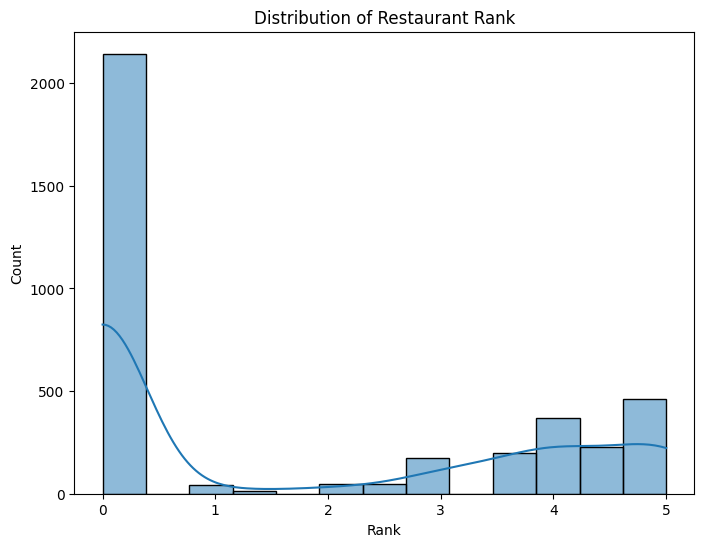

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('TotalData1.csv')

# Explore the dataset
print(data.head())  # View the first few rows
print(data.info())  # Check the data types and missing values
print(data.describe())  # Get statistical summary of numerical columns

# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['rest rank'], kde=True)
plt.title('Distribution of Restaurant Rank')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()




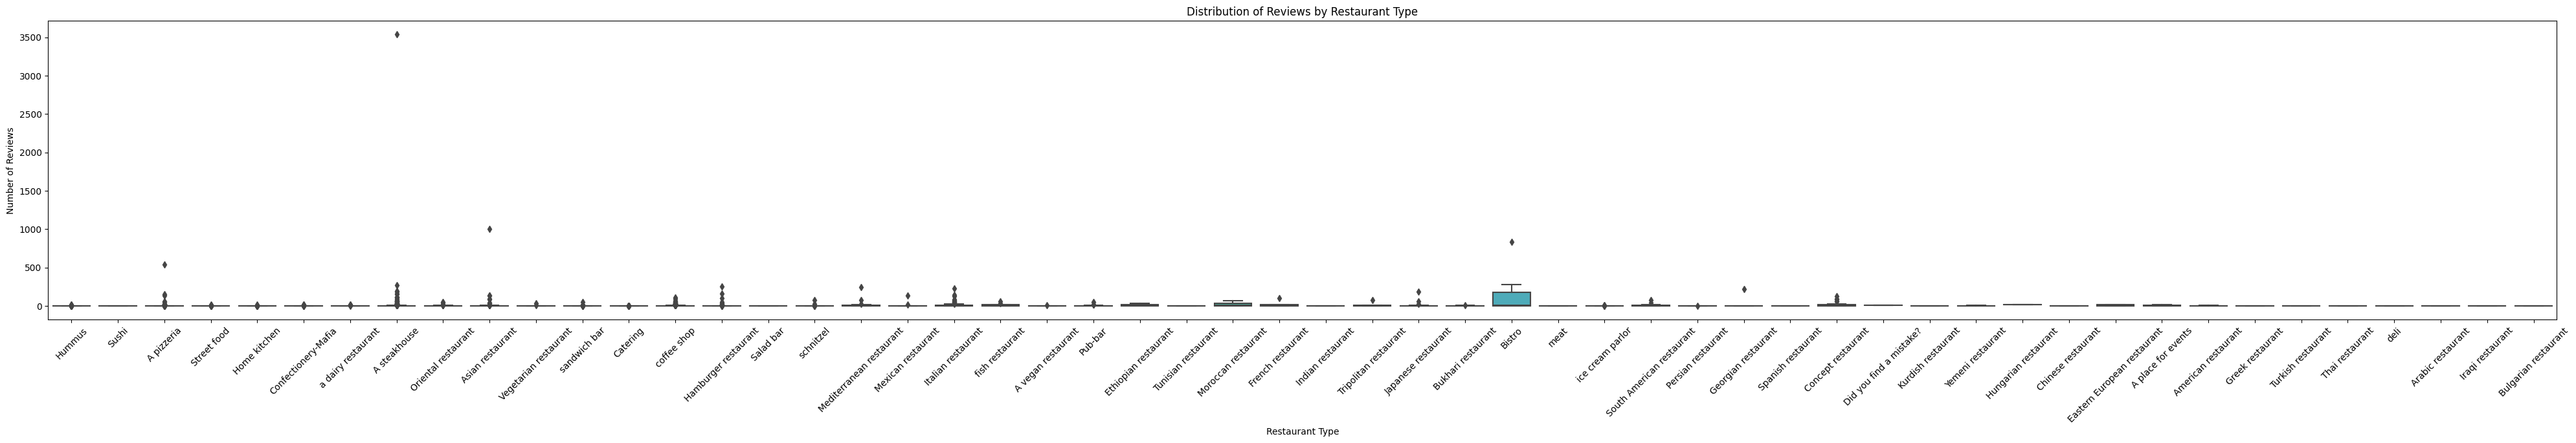

In [45]:
plt.figure(figsize=(50, 6))
sns.boxplot(x='rest type', y='reviews num', data=data)
plt.title('Distribution of Reviews by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()
